In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

C:\Users\nsgr6\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('Walmart_item_analyse.csv')
df.head()

,Unnamed: 0,SKU,Product_Name,Product_Category,Price,Promo_Start_Date,Promo_End_Date,Comparison_Price,Comparison_Price_Type,Buy_Box_Item_Price,...,Primary_Category_Path,Brand,Offer_Start_Date,Offer_End_Date,Item_Creation_Date,Reviews_Count,Average_Rating,Competitor_Price,Competitor_Ship_Price,Cost
0,0,028400043816-C-F-L1-12.99,Sun Chips Whole Grain Snacks Variety Mix 30 Ba...,Food & Beverage,39.99,1970-01-01,1970-01-01,30.98,Was Price,39.99,...,"[""Home Page"",""Food"",""Snacks, Cookies & Chips"",...",SunChips,2022-08-29,2041-09-12,2018-04-06,6,3.5,42.91,-1.0,15.996
1,1,096619461769-C-P-L1-11.49,Kirkland Signature Organic Balsamic Vinegar 1 ...,Food & Beverage,25.99,1970-01-01,1970-01-01,28.95,Was Price,26.95,...,"[""Home Page"",""Food"",""Pantry"",""Cooking oils & v...",Kirkland Signature,2022-11-13,2049-11-13,2021-03-02,0,0.0,27.70,0.0,10.396
2,2,794297801814-CB-P-L1-46.99,20 oz Coke cup with logo,Other,103.99,1970-01-01,1970-01-01,103.99,Was Price,103.99,...,"[""Home Page"",""Home"",""Kitchen & Dining"",""Dining...",Generic,2023-05-27,2049-12-31,2022-07-29,0,0.0,0.00,0.0,41.596
3,3,096619067237-CB-F-L1-13.99,Kirkland Signature Trail Mix Snack Packs 2 Oun...,Food & Beverage,29.75,1970-01-01,1970-01-01,37.95,List Price,31.95,...,"[""Home Page"",""Food"",""Snacks, Cookies & Chips"",...",Kirkland Signature,2017-09-26,2041-09-26,2021-07-12,1,4.0,39.99,0.0,11.900
4,4,300410011574-C-P-L1-14.99,Lot of 8 Oral B CrossAction Advanced Soft Toot...,"Beauty, Personal Care, & Hygiene",20.99,1970-01-01,1970-01-01,19.99,Was Price,24.99,...,"[""Home Page"",""Personal Care"",""Oral Care"",""Toot...",Oral-B,2022-09-16,2049-09-27,2022-05-05,0,0.0,19.90,0.0,8.396


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1044 non-null   int64  
 1   SKU                    1044 non-null   object 
 2   Product_Name           1044 non-null   object 
 3   Product_Category       1044 non-null   object 
 4   Price                  1044 non-null   float64
 5   Promo_Start_Date       1044 non-null   object 
 6   Promo_End_Date         1044 non-null   object 
 7   Comparison_Price       1044 non-null   float64
 8   Comparison_Price_Type  1044 non-null   object 
 9   Buy_Box_Item_Price     1044 non-null   float64
 10  Buy_Box_Eligible       1044 non-null   object 
 11  MSRP                   1044 non-null   float64
 12  Product_Tax_Code       1044 non-null   int64  
 13  Ship_Methods           1044 non-null   object 
 14  Shipping_Weight        1044 non-null   float64
 15  Fulf

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1044.0,5.215000e+02,301.521144,0.00,2.607500e+02,521.500,7.822500e+02,1043.000
Price,1044.0,4.574703e+01,55.106696,5.65,2.190000e+01,29.675,4.352500e+01,658.990
Comparison_Price,1044.0,4.574518e+01,56.758813,0.00,2.099000e+01,28.970,4.299000e+01,658.990
Buy_Box_Item_Price,1044.0,4.342923e+01,50.867477,3.47,2.029750e+01,28.475,4.051250e+01,474.990
MSRP,1044.0,3.776965e+01,68.327058,0.00,0.000000e+00,17.460,4.475000e+01,639.950
Product_Tax_Code,1044.0,2.053564e+06,110594.127847,2038305.00,2.038362e+06,2038710.000,2.040197e+06,3001205.000
Shipping_Weight,1044.0,5.383704e+00,7.530352,0.00,1.600000e+00,3.000,5.340000e+00,95.000
Reviews_Count,1044.0,4.218429e+02,1810.318961,0.00,0.000000e+00,4.000,1.422500e+02,30715.000
Average_Rating,1044.0,3.016222e+00,2.142776,0.00,0.000000e+00,4.300,4.700000e+00,5.000
Competitor_Price,1044.0,3.818640e+01,48.446980,0.00,1.744750e+01,25.500,3.903750e+01,489.500


EDA

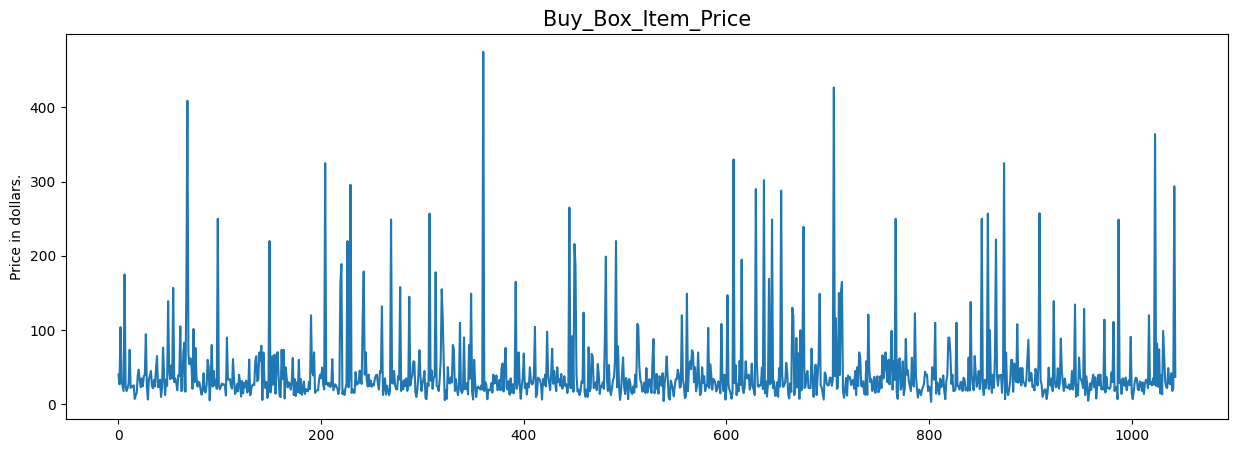

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df['Buy_Box_Item_Price'])
plt.title('Buy_Box_Item_Price', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [6]:
df[df['Buy_Box_Item_Price'] == df['Price']].shape # ikiside ayni degerler

(419, 28)

In [7]:
df[df['Buy_Box_Item_Price'] > df['Price']].shape # ikiside ayni degerler

(211, 28)

In [8]:
df[df['Buy_Box_Item_Price'] < df['Price']].shape # ikiside ayni degerler

(414, 28)

In [9]:
df.isnull().sum().sum()

0

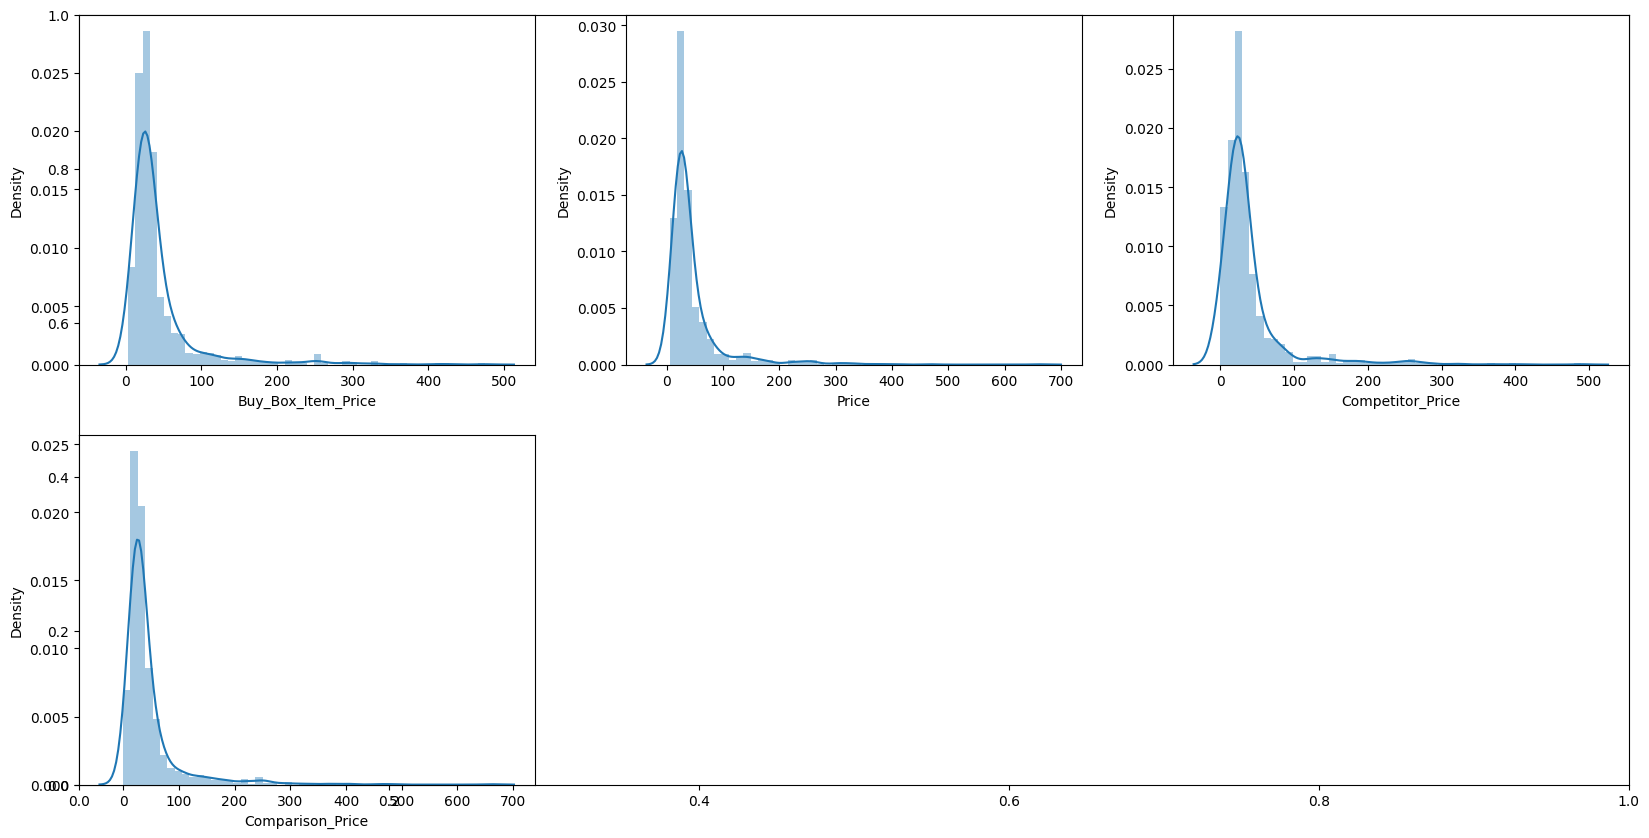

In [10]:
features = ['Buy_Box_Item_Price', 'Price', 'Competitor_Price', 'Comparison_Price']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

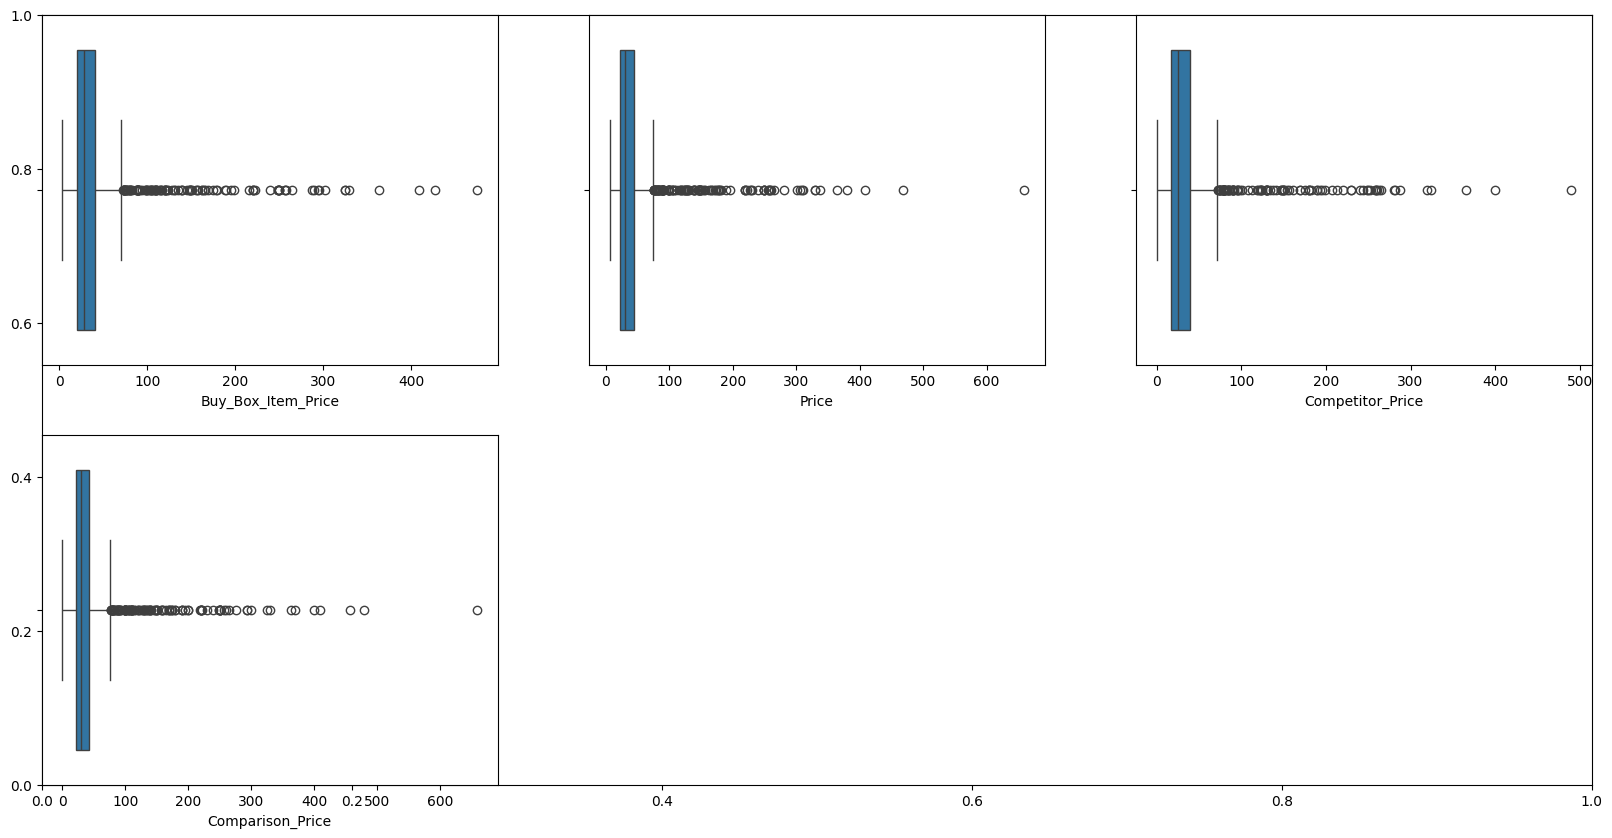

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(x=df[col])
plt.show()

Feature-Engineering

In [12]:
df.sample(2)

,Unnamed: 0,SKU,Product_Name,Product_Category,Price,Promo_Start_Date,Promo_End_Date,Comparison_Price,Comparison_Price_Type,Buy_Box_Item_Price,...,Primary_Category_Path,Brand,Offer_Start_Date,Offer_End_Date,Item_Creation_Date,Reviews_Count,Average_Rating,Competitor_Price,Competitor_Ship_Price,Cost
301,301,078731971272-CB-F-L1-15.99,"Dixie To Go Coffee Cups and Lids, 12 Oz, 120 C...","Home Decor, Kitchen, & Other",39.15,1970-01-01,1970-01-01,29.99,Was Price,33.97,...,"[""Home Page"",""Household Essentials"",""Paper & P...",Dixie,2022-09-18,2049-12-31,2021-09-15,1010,4.2,31.99,0.0,15.660
86,86,0819459015837-S-F-L1-19.92,Boogie Board VersaTile - Red,Other,15.99,1970-01-01,1970-01-01,19.99,Was Price,15.99,...,"[""Home Page"",""Electronics"",""Computers, Laptops...",BOOGIE BOARD,2022-08-09,2049-12-29,2021-08-09,13,4.7,25.77,0.0,6.396


In [13]:
splitted = df['Offer_Start_Date'].str.split('-', expand=True)

df['start_day'] = splitted[2].astype('int')
df['start_month'] = splitted[1].astype('int')
df['start_year'] = splitted[0].astype('int')

splitted = df['Offer_End_Date'].str.split('-', expand=True)

df['end_day'] = splitted[2].astype('int')
df['end_month'] = splitted[1].astype('int')
df['end_year'] = splitted[0].astype('int')

df.head()

,Unnamed: 0,SKU,Product_Name,Product_Category,Price,Promo_Start_Date,Promo_End_Date,Comparison_Price,Comparison_Price_Type,Buy_Box_Item_Price,...,Average_Rating,Competitor_Price,Competitor_Ship_Price,Cost,start_day,start_month,start_year,end_day,end_month,end_year
0,0,028400043816-C-F-L1-12.99,Sun Chips Whole Grain Snacks Variety Mix 30 Ba...,Food & Beverage,39.99,1970-01-01,1970-01-01,30.98,Was Price,39.99,...,3.5,42.91,-1.0,15.996,29,8,2022,12,9,2041
1,1,096619461769-C-P-L1-11.49,Kirkland Signature Organic Balsamic Vinegar 1 ...,Food & Beverage,25.99,1970-01-01,1970-01-01,28.95,Was Price,26.95,...,0.0,27.70,0.0,10.396,13,11,2022,13,11,2049
2,2,794297801814-CB-P-L1-46.99,20 oz Coke cup with logo,Other,103.99,1970-01-01,1970-01-01,103.99,Was Price,103.99,...,0.0,0.00,0.0,41.596,27,5,2023,31,12,2049
3,3,096619067237-CB-F-L1-13.99,Kirkland Signature Trail Mix Snack Packs 2 Oun...,Food & Beverage,29.75,1970-01-01,1970-01-01,37.95,List Price,31.95,...,4.0,39.99,0.0,11.900,26,9,2017,26,9,2041
4,4,300410011574-C-P-L1-14.99,Lot of 8 Oral B CrossAction Advanced Soft Toot...,"Beauty, Personal Care, & Hygiene",20.99,1970-01-01,1970-01-01,19.99,Was Price,24.99,...,0.0,19.90,0.0,8.396,16,9,2022,27,9,2049


In [14]:
df['is_quarter_end'] = np.where(df['start_month']%3==0,1,0)
df.sample(5)

,Unnamed: 0,SKU,Product_Name,Product_Category,Price,Promo_Start_Date,Promo_End_Date,Comparison_Price,Comparison_Price_Type,Buy_Box_Item_Price,...,Competitor_Price,Competitor_Ship_Price,Cost,start_day,start_month,start_year,end_day,end_month,end_year,is_quarter_end
970,970,Halley-Soldier-Hand4-Burgundy,"HALLEY Decorative Hand Towels Set, 4 Pack - Tu...","Home Decor, Kitchen, & Other",19.99,1970-01-01,1970-01-01,16.99,Was Price,19.99,...,20.40,0.0,7.996,17,11,2020,23,12,2049,0
217,217,191566646679-bstock-effergrip,"Effergrip Denture Adhesive Cream, Minty Fresh ...","Beauty, Personal Care, & Hygiene",13.90,1970-01-01,1970-01-01,14.74,Was Price,13.90,...,14.74,0.0,5.560,8,1,2024,30,12,2049,0
860,860,194735018093-C-P-L1-48.99,Wizarding World Harry Potter 5-Piece 10-inch F...,Toys,68.99,1970-01-01,1970-01-01,99.95,Was Price,99.95,...,95.00,0.0,27.596,29,10,2022,27,8,2049,0
55,55,028400480635-S-P-L1-12.98,SunChips Mix Variety Pack (30 Count),Food & Beverage,36.90,1970-01-01,1970-01-01,30.57,Was Price,29.99,...,36.90,0.0,14.760,15,3,2021,30,12,2049,1
745,745,810607020840-C-F-L2-8.99,"PopCorners Popped-Corn Snack, Variety Pack, 1 ...",Food & Beverage,29.99,1970-01-01,1970-01-01,27.42,Was Price,26.90,...,29.99,0.0,11.996,7,2,2021,30,12,2049,0


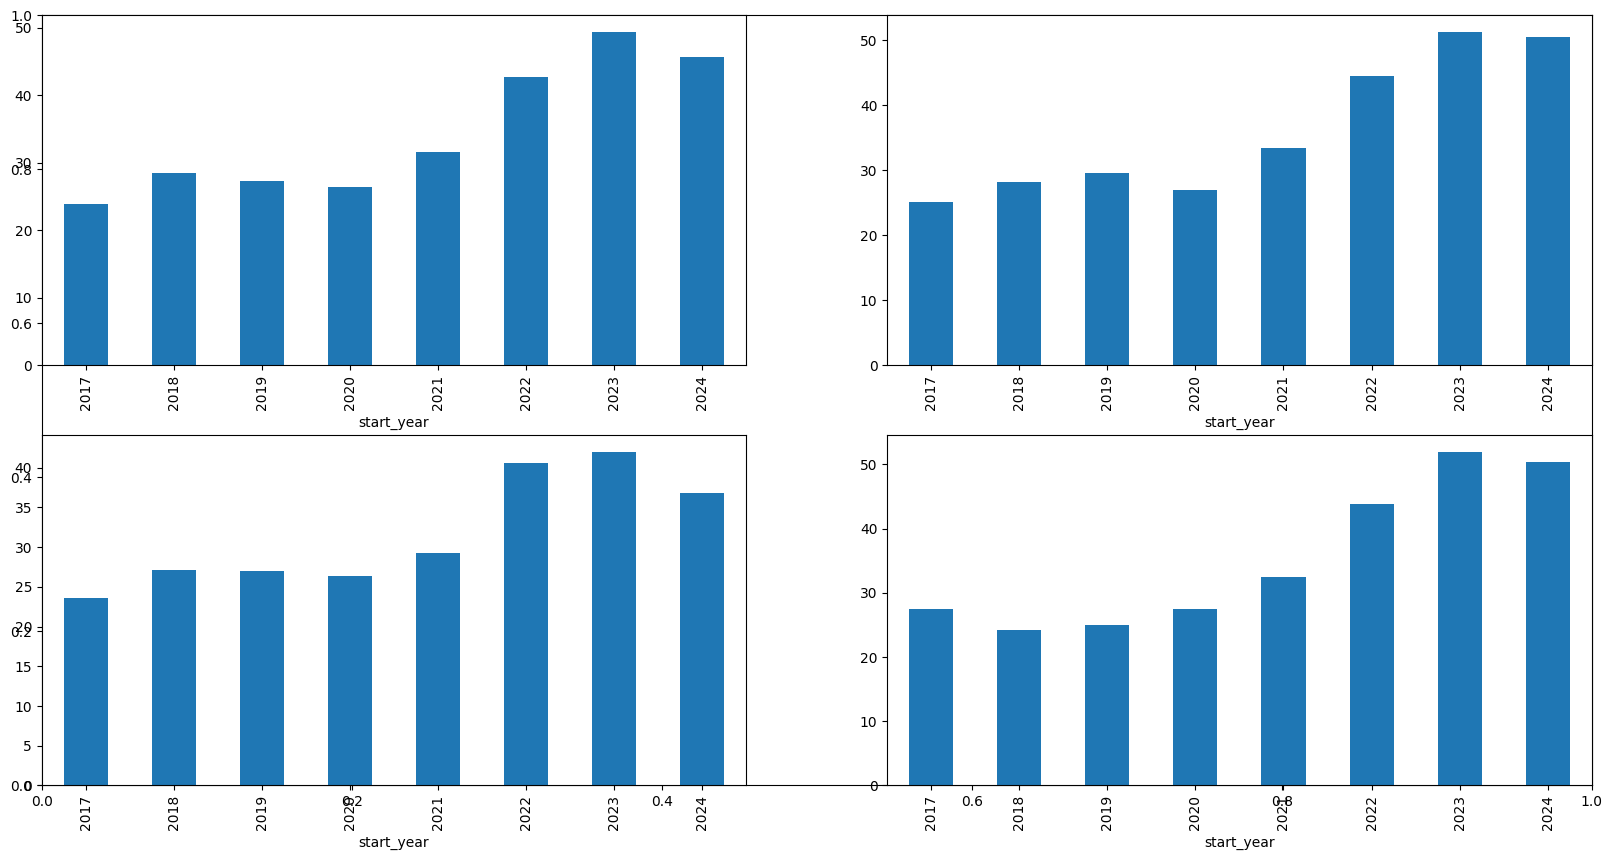

In [15]:
data_grouped = df.groupby('start_year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Buy_Box_Item_Price', 'Price', 'Competitor_Price', 'Comparison_Price']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [16]:
df.groupby('is_quarter_end').mean()

,Unnamed: 0,Price,Comparison_Price,Buy_Box_Item_Price,MSRP,Product_Tax_Code,Shipping_Weight,Reviews_Count,Average_Rating,Competitor_Price,Competitor_Ship_Price,Cost,start_day,start_month,start_year,end_day,end_month,end_year
is_quarter_end,,,,,,,,,,,,,,,,,,
0,513.311669,44.388168,44.591581,42.123929,34.845968,2.059097e+06,5.219091,368.072378,2.972378,36.788538,0.026278,17.755267,14.673560,5.707533,2022.502216,26.896603,11.140325,2047.936484
1,536.604905,48.253706,47.873215,45.837112,43.162916,2.043358e+06,5.687362,521.032698,3.097101,40.765014,0.108038,19.301482,17.070845,8.525886,2022.416894,27.108992,11.035422,2047.700272


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1044 non-null   int64  
 1   SKU                    1044 non-null   object 
 2   Product_Name           1044 non-null   object 
 3   Product_Category       1044 non-null   object 
 4   Price                  1044 non-null   float64
 5   Promo_Start_Date       1044 non-null   object 
 6   Promo_End_Date         1044 non-null   object 
 7   Comparison_Price       1044 non-null   float64
 8   Comparison_Price_Type  1044 non-null   object 
 9   Buy_Box_Item_Price     1044 non-null   float64
 10  Buy_Box_Eligible       1044 non-null   object 
 11  MSRP                   1044 non-null   float64
 12  Product_Tax_Code       1044 non-null   int64  
 13  Ship_Methods           1044 non-null   object 
 14  Shipping_Weight        1044 non-null   float64
 15  Fulf

# ordinal encoding

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# OrdinalEncoder'ı oluştur
encoder = OrdinalEncoder()

# Kategorik sütunları seçin
columns_to_encode = ['Product_Name', 'Product_Category', 'Comparison_Price_Type', 
                     'Buy_Box_Eligible', 'Ship_Methods', 'Fulfillment_Type', 
                     'WFS_Sales_Restriction', 'Shelf_Name', 'Brand']
                     
# Kategorik sütunları encode edin
df_obj_enc = encoder.fit_transform(df[columns_to_encode])

# Encode edilmiş veriyi DataFrame'e dönüştürün
df_obj_enc_df = pd.DataFrame(df_obj_enc, columns=columns_to_encode)

# Diğer sütunları alın
df_num = df.drop(columns=columns_to_encode)

# DataFrame'leri birleştirin
df_encoded = pd.concat([df_obj_enc_df, df_num], axis=1)

df_encoded.sample(3)

,Product_Name,Product_Category,Comparison_Price_Type,Buy_Box_Eligible,Ship_Methods,Fulfillment_Type,WFS_Sales_Restriction,Shelf_Name,Brand,Unnamed: 0,...,Competitor_Price,Competitor_Ship_Price,Cost,start_day,start_month,start_year,end_day,end_month,end_year,is_quarter_end
461,537.0,23.0,1.0,1.0,0.0,2.0,9.0,392.0,238.0,461,...,5.98,0.0,4.760,21,2,2024,31,12,2049,0
155,721.0,16.0,1.0,1.0,0.0,1.0,9.0,482.0,320.0,155,...,6.59,0.0,6.760,21,3,2024,31,12,2049,1
62,435.0,23.0,1.0,1.0,0.0,1.0,9.0,499.0,193.0,62,...,0.00,0.0,7.196,9,9,2023,25,12,2049,1


In [19]:
df_encoded.sample(3)

,Product_Name,Product_Category,Comparison_Price_Type,Buy_Box_Eligible,Ship_Methods,Fulfillment_Type,WFS_Sales_Restriction,Shelf_Name,Brand,Unnamed: 0,...,Competitor_Price,Competitor_Ship_Price,Cost,start_day,start_month,start_year,end_day,end_month,end_year,is_quarter_end
737,448.0,16.0,1.0,1.0,0.0,1.0,9.0,195.0,194.0,737,...,13.50,0.0,5.196,23,7,2022,20,12,2049,0
235,805.0,28.0,0.0,1.0,0.0,2.0,9.0,106.0,370.0,235,...,32.99,0.0,10.900,20,11,2022,20,11,2049,0
887,308.0,23.0,1.0,1.0,0.0,2.0,3.0,230.0,191.0,887,...,108.00,0.0,43.200,31,1,2024,30,12,2049,0


In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_Name           1044 non-null   float64
 1   Product_Category       1044 non-null   float64
 2   Comparison_Price_Type  1044 non-null   float64
 3   Buy_Box_Eligible       1044 non-null   float64
 4   Ship_Methods           1044 non-null   float64
 5   Fulfillment_Type       1044 non-null   float64
 6   WFS_Sales_Restriction  1044 non-null   float64
 7   Shelf_Name             1044 non-null   float64
 8   Brand                  1044 non-null   float64
 9   Unnamed: 0             1044 non-null   int64  
 10  SKU                    1044 non-null   object 
 11  Price                  1044 non-null   float64
 12  Promo_Start_Date       1044 non-null   object 
 13  Promo_End_Date         1044 non-null   object 
 14  Comparison_Price       1044 non-null   float64
 15  Buy_

In [21]:
df_encoded.drop(columns=['Unnamed: 0', 'SKU','Promo_Start_Date', 'Promo_End_Date', 
                 'Primary_Category_Path', 'Item_Creation_Date', 'Offer_Start_Date',
                        'Offer_End_Date'], inplace=True)

# model

In [22]:
X = df_encoded.drop(['Buy_Box_Item_Price'], axis=1)
y = df_encoded['Buy_Box_Item_Price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = pd.DataFrame(y)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)


(939, 26) (105, 26)


In [23]:
from sklearn.linear_model import LinearRegression

model_poly = LinearRegression()

model_poly.fit(X_train, y_train)

y_pred = model_poly.predict(X_test)

# Sütun vektörlerine dönüştürme
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

my_dict = {"Actual": y_test.flatten(), "pred": y_pred.flatten(), "residual": y_test.flatten() - y_pred.flatten()}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
0,21.49,21.462719,0.027281
1,30.88,26.579918,4.300082
2,24.99,31.785524,-6.795524
3,17.81,21.433838,-3.623838
4,28.98,38.307619,-9.327619
...,...,...,...
100,21.41,24.785188,-3.375188
101,264.98,242.106754,22.873246
102,156.99,141.504960,15.485040
103,34.99,56.545793,-21.555793


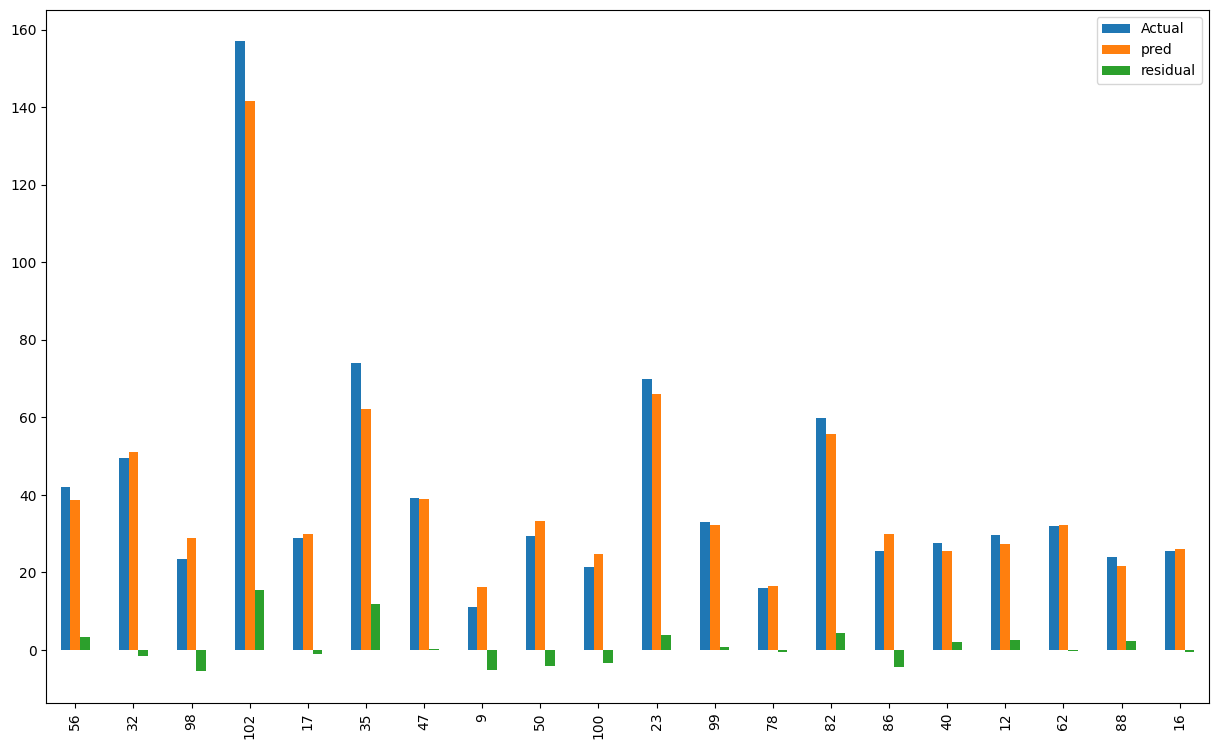

In [24]:
compare.sample(20).plot(kind="bar", figsize=(15,9));

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [26]:
y_test_pred = model_poly.predict(X_test)

eval_metric(y_test, y_test_pred) # Test kisminin degerleri

Model testing performance:
--------------------------
R2_score 	: 0.9167445068610212
MAE 		: 6.243844051928895
MSE 		: 132.2349846382121
RMSE 		: 11.499347139651542


In [27]:
y_train_pred = model_poly.predict(X_train)

eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9254006349497783
MAE 		: 5.739226516885687
MSE 		: 201.12475625412154
RMSE 		: 14.181846010097612


# Adjusted R2 Score

In [28]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    # R2 score
    n = df.shape[0]         # number of observations - gözlem
    p = df.shape[1] - 1     # number of indep. variable = feature
    adj_r2 = 1 - (1-r2) * (n-1)/(n-p-1)
    return adj_r2

In [29]:
adj_r2(y_test, y_pred, df_encoded)

0.9146160478427189

# Coef, Feature Imp.

In [30]:
model_poly.coef_

array([[-3.24779626e-01, -3.69954739e-01,  8.31864401e-01,
         1.91961368e-01, -1.23726409e+00, -1.54553081e+00,
         4.80727136e-02,  2.55501085e-01,  7.91161809e-01,
         8.31291481e+00,  2.73755415e+01,  3.85065008e+00,
         3.29863255e-01,  2.69610190e+00, -8.47767111e-01,
        -1.63829296e+00,  1.03882549e+00,  4.70811098e-01,
         8.31291481e+00, -1.95063715e-02, -2.86763877e-01,
        -3.47788203e-01,  5.19790995e-01, -2.08224003e-01,
        -1.20544611e-01,  3.68455995e-01]])

In [31]:
# 'Buy_Box_Item_Price' sütununu bırakarak katsayıları bir DataFrame'e dönüştürün
coeff_df = pd.DataFrame(model_poly.coef_.reshape(-1, 1), index=df_encoded.drop(['Buy_Box_Item_Price'], axis=1).columns, columns=["Coefficient"])
coeff_df

,Coefficient
Product_Name,-0.324780
Product_Category,-0.369955
Comparison_Price_Type,0.831864
Buy_Box_Eligible,0.191961
Ship_Methods,-1.237264
Fulfillment_Type,-1.545531
WFS_Sales_Restriction,0.048073
Shelf_Name,0.255501
Brand,0.791162
Price,8.312915


# yeni model

In [32]:
df_fin = df_encoded[["Price","Comparison_Price","MSRP","Shipping_Weight",
                     "Average_Rating","Buy_Box_Item_Price"]]
df_fin.sample(3)

,Price,Comparison_Price,MSRP,Shipping_Weight,Average_Rating,Buy_Box_Item_Price
908,33.99,56.90,72.99,2.68,2.8,54.90
696,7.40,6.44,10.99,2.00,4.5,6.39
578,32.90,36.90,46.42,1.00,4.9,37.99


In [33]:
X = df_fin.drop(['Buy_Box_Item_Price'], axis=1)
y = df_fin['Buy_Box_Item_Price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = pd.DataFrame(y)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

(939, 5) (105, 5)


In [34]:
final_model = LinearRegression()

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

# Sütun vektörlerine dönüştürme
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

my_dict = {"Actual": y_test.flatten(), "pred": y_pred.flatten(), "residual": y_test.flatten() - y_pred.flatten()}
compare2 = pd.DataFrame(my_dict)
compare2

,Actual,pred,residual
0,21.49,22.771399,-1.281399
1,30.88,28.928753,1.951247
2,24.99,29.209486,-4.219486
3,17.81,21.640445,-3.830445
4,28.98,36.772468,-7.792468
...,...,...,...
100,21.41,24.553564,-3.143564
101,264.98,239.667003,25.312997
102,156.99,139.948804,17.041196
103,34.99,56.503018,-21.513018


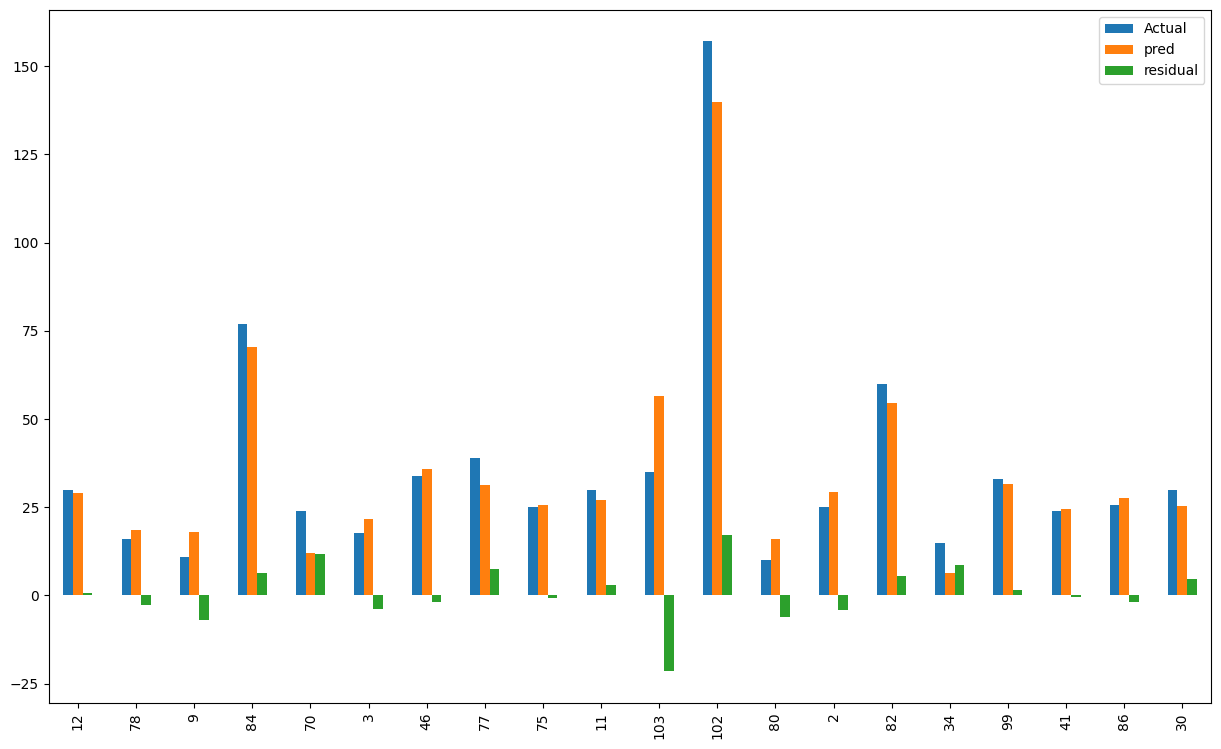

In [35]:
compare2.sample(20).plot(kind="bar", figsize=(15,9));

In [36]:
y_test_pred = final_model.predict(X_test)

eval_metric(y_test, y_test_pred) # Test kisminin degerleri

Model testing performance:
--------------------------
R2_score 	: 0.9166663375407977
MAE 		: 6.091128460526569
MSE 		: 132.3591412370046
RMSE 		: 11.50474429255186


In [37]:
y_train_pred = final_model.predict(X_train)

eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.9240423172190577
MAE 		: 5.9188007355261245
MSE 		: 204.7868694949367
RMSE 		: 14.310376287677997


In [38]:
adj_r2(y_test, y_pred, df_encoded)  # Adj R2 Score

0.9145358800934632

In [39]:
final_model.coef_

array([[17.50529962, 27.16628731,  4.01496116,  2.75524293, -1.60713476]])

In [40]:
coeff_df = pd.DataFrame(final_model.coef_.reshape(-1, 1), index=df_fin.drop(['Buy_Box_Item_Price'], axis=1).columns, columns=["Coefficient"])
coeff_df

,Coefficient
Price,17.505300
Comparison_Price,27.166287
MSRP,4.014961
Shipping_Weight,2.755243
Average_Rating,-1.607135


# Model Deployment

In [65]:
import joblib

# Pipeline'i kaydetme
joblib.dump(final_model, 'BuyBoxPrice_model.pkl')
joblib.dump(scaler, 'BuyBoxPriceScaler.pkl')

['BuyBoxPriceScaler.pkl']

# Prediction

In [66]:
loaded_model = joblib.load('BuyBoxPrice_model.pkl')
loaded_scaler = joblib.load('BuyBoxPriceScaler.pkl')
#scaler = StandardScaler()

In [57]:
# ornek feture degerleri, urun icin degerler verildiginde model bir buybox fiyati belirleyecek.
# Listedeki urunler Item ID = 14227376, 905481374, 149886943, 545354261

urunler = [[148.99, 149, 249.99, 5, 4.9],
           [19.95, 29.5, 39.99, 1.21, 4.8],
           [17.2, 22.95, 22.5, 1, 4.8],
           [39.99, 30.98, 48.99, 3, 3.5]]
urunler

[[148.99, 149, 249.99, 5, 4.9],
 [19.95, 29.5, 39.99, 1.21, 4.8],
 [17.2, 22.95, 22.5, 1, 4.8],
 [39.99, 30.98, 48.99, 3, 3.5]]

In [67]:
urunler_scaled = loaded_scaler.fit_transform(urunler)
#urunler_scaled = scaler.fit_transform(urunler)
#urunler_scaled = scaler.transform(urunler)
urunler_scaled

array([[ 1.70900171,  1.72918635,  1.7228739 ,  1.51765072,  0.69109474],
       [-0.67619777, -0.54424401, -0.5437459 , -0.8324601 ,  0.51832106],
       [-0.72702928, -0.66885462, -0.73252295, -0.96267732,  0.51832106],
       [-0.30577466, -0.51608771, -0.44660505,  0.2774867 , -1.72773685]])

In [68]:
final_model.predict(urunler_scaled)

array([[130.31779851],
       [ 11.50565872],
       [  6.1139174 ],
       [ 25.81283563]])

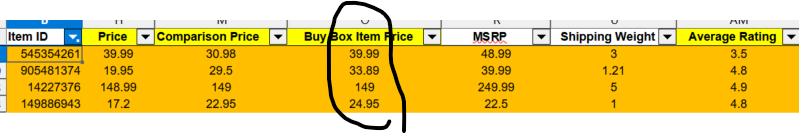